In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns

# 한글 폰트 설정
font_path = 'NanumGothic.ttf'  # 사용할 한글 폰트 경로
font_manager.fontManager.addfont(font_path)
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 데이터 로드
file_path = '[BabyCareAI]AI 육아 앱 관련 설문조사(응답).xlsx'
survey_data = pd.read_excel(file_path, engine='openpyxl')

In [3]:
# 열 이름 확인
column_symptoms = '아이에게 원인을 알 수 없는 증상이 발생하여 당황한 경험이 있으신가요?\n있다면, 어떤 증상에 대한 것인가요?'
column_diseases = '만약 \'피부 질환\'에 체크하셨다면, 해당 질환은 무엇이었나요?'
# 응답 종류 확인
unique_responses_symptoms = survey_data[column_symptoms].unique()
unique_responses_diseases = survey_data[column_diseases].unique()

In [4]:
print(unique_responses_symptoms)

['피부 질환(태열, 땀띠, 침독, 알러지, 수족구 등), 열, 발달 관련'
 '피부 질환(태열, 땀띠, 침독, 알러지, 수족구 등), 변(색깔, 묽기 등), 열, 경련'
 '피부 질환(태열, 땀띠, 침독, 알러지, 수족구 등), 변(색깔, 묽기 등), 열, 발달 관련'
 '변(색깔, 묽기 등), 열, 행동' '열' '피부 질환(태열, 땀띠, 침독, 알러지, 수족구 등), 변(색깔, 묽기 등), 행동'
 '열, 울음, 팔빠짐(그때는 초보라 팔빠진지도 몰랐음)' '열, 행동' '울음'
 '피부 질환(태열, 땀띠, 침독, 알러지, 수족구 등), 변(색깔, 묽기 등), 발달 관련'
 '피부 질환(태열, 땀띠, 침독, 알러지, 수족구 등), 열' '피부 질환(태열, 땀띠, 침독, 알러지, 수족구 등)'
 '피부 질환(태열, 땀띠, 침독, 알러지, 수족구 등), 변(색깔, 묽기 등), 울음, 수면'
 '피부 질환(태열, 땀띠, 침독, 알러지, 수족구 등), 변(색깔, 묽기 등), 열, 울음'
 '피부 질환(태열, 땀띠, 침독, 알러지, 수족구 등), 변(색깔, 묽기 등), 발달 관련, 울음'
 '피부 질환(태열, 땀띠, 침독, 알러지, 수족구 등), 변(색깔, 묽기 등), 열, 목감기로 호흡이 이상함'
 '피부 질환(태열, 땀띠, 침독, 알러지, 수족구 등), 변(색깔, 묽기 등)'
 '피부 질환(태열, 땀띠, 침독, 알러지, 수족구 등), 열, 울음'
 '피부 질환(태열, 땀띠, 침독, 알러지, 수족구 등), 변(색깔, 묽기 등), 열'
 '피부 질환(태열, 땀띠, 침독, 알러지, 수족구 등), 변(색깔, 묽기 등), 수면'
 '피부 질환(태열, 땀띠, 침독, 알러지, 수족구 등), 변(색깔, 묽기 등), 열, 울음, 수면'
 '피부 질환(태열, 땀띠, 침독, 알러지, 수족구 등), 열, 울음, 해당 경험 없음' '토'
 '피부 질환(태열, 땀띠, 침독, 알러지, 수족구 등), 변(색깔, 묽기 등), 열, 수면'
 '피부 질환(태열, 땀띠, 침독, 알러지, 수족구 등

In [5]:
print(unique_responses_diseases)

['수족구' '알수없는 알러지반응, 아토피, 원형건선' nan '수족구,두드러기 알레르기(모기알러지)' '해당없음'
 '피부에 무언가가 나면 어떤 질병인지 진단인지 알수없어서요' '땀띠나 열발진' '아토피' '땀띠, 이유모를발진, 두피각질'
 '농가진, 아토피' '습진, 원인 모를 피부염' '두드러기' '태열, 땀띠, 습진,침독, 알러지, 수족구' '접촉성피부염'
 '태열. 발진. 두드러기' '땀띠 아토피' '땀띠/모기알러지' '원인불명의알러지' '건조함 가려움 두드러기'
 '피부발진(면역력 저하로 인한 것을 병원 진료로 확인함)' '신생아여드름,수두,모기알러지(물집)' '발진' '알레르기 발진'
 '아토피피부염' '아토피와 알레르기 반응' '수족구, 농가진' '알러지,땀띠,수족구,접촉성피부염' '원인을 알수 없는 발진'
 '알레르기 반응(부어오르고, 두드러기가 생김), 태열, 수족구인지 아닌지' '침독' '땀띠, 생식기 발진' '열꽃' '파라바이러스'
 '태열 땀띠 몽고반점' '원인불명의 알레르기'
 '이유없는 발진, 알러지 아직도 원인은 모르지만 36개월 이전 이유없는 발진이 꽤 있었음(뾰루지같은)' '알러지'
 '신생아 시절 발생한 아토피, 수족구' '복숭아알러지' '가려움증 및 발진' '식품 알레르기 (밀가루, 계란)'
 '원인미상 두드러기' '수족구, 민감성피부' '이유를 알 수 없는 두드러기' '침독, 아토피' '태열'
 '농가진, 원인불명의 두드러기' '태열, 땀띠' '아토피 알러지' '황달 태열 ' '태열, 알러지' '태열로 인한 신생아 여드름'
 '천연오일로 인한 트러블' '태텰' '바이러스에 의한 전신발진' '갑작스러운 두드러기']


In [6]:
# 주요 카테고리 정의
categories_symptoms = {
    '피부 질환': ['태열', '땀띠', '침독', '알러지', '수족구'],
    '변 이상': ['변(색깔, 묽기 등)'],
    '열': [' 열', '고열', '열성경련 증세'],
    '경련': [' 경련'],
    '발달 관련': ['발달'],
    '행동': ['행동'],
    '울음': ['울음'],
    '수면': ['수면'],
    '소화 문제': ['토', '구토'],
    '기타': ['해당 경험 없음', '기타']
}

categories_diseases = {
    '수족구': ['수족구'],
    '알러지': ['알러지', '알레르기', '모기알러지', '모기 알레르기', '모기 알러지'],
    '아토피': ['아토피', '아토피피부염', '아토피 피부염'],
    '땀띠': ['땀띠', '열발진', '열꽃'],
    '두드러기': ['두드러기', '원인불명의두드러기', '이유를 알 수 없는 두드러기'],
    '농가진': ['농가진'],
    '태열': ['태열', '태텰'],
    '발진': ['발진', '피부 발진'],
    '기타': ['해당없음', '원인불명', '신생아 여드름', '파라바이러스', '황달', '천연오일로 인한 트러블']
}

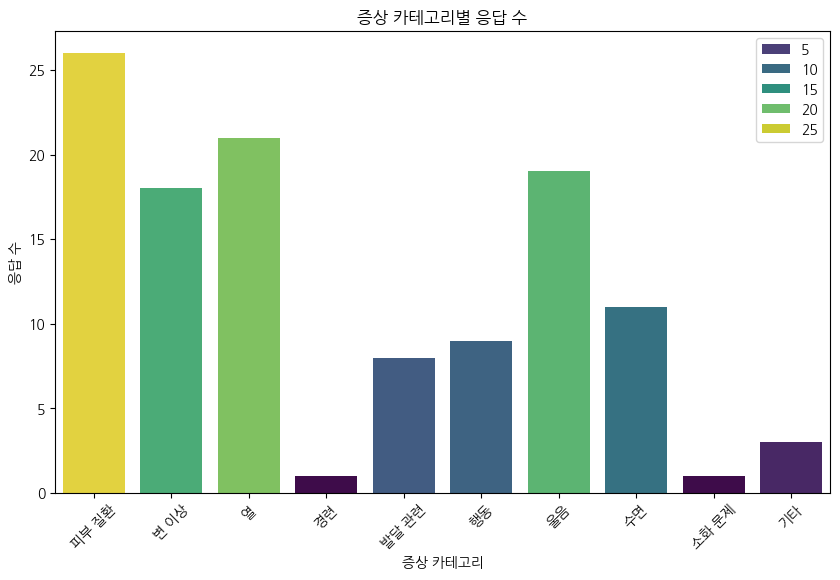

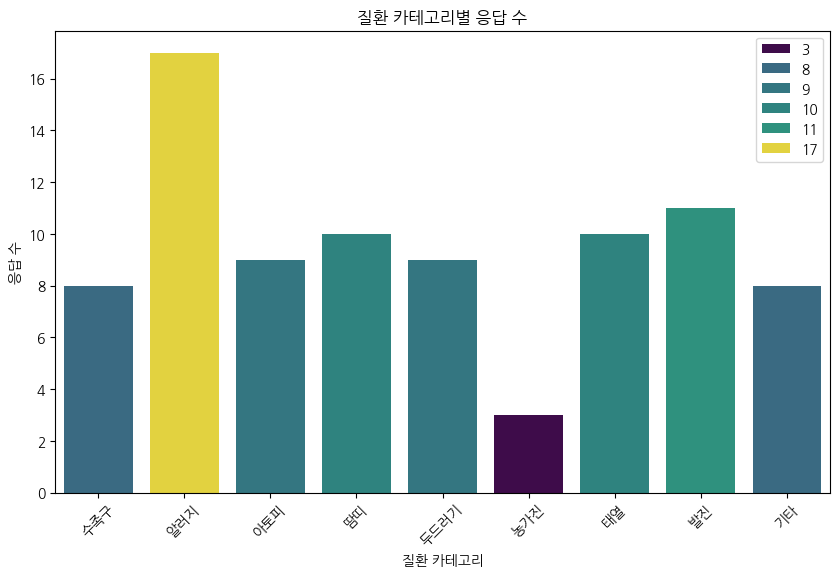

In [8]:
# 각 카테고리의 카운트를 저장할 딕셔너리 초기화
category_symptoms_counts = {category: 0 for category in categories_symptoms.keys()}
category_diseases_counts = {category: 0 for category in categories_diseases.keys()}

# 응답에서 증상 카테고리 카운트
for response in unique_responses_symptoms:
    for category, keywords in categories_symptoms.items():
        if any(keyword in response for keyword in keywords):
            category_symptoms_counts[category] += 1

# 응답에서 질환 카테고리 카운트
for response in unique_responses_diseases:
    if pd.isna(response):  # NaN 값 무시
        continue
    for category, keywords in categories_diseases.items():
        if any(keyword in response for keyword in keywords):
            category_diseases_counts[category] += 1

# 증상 카테고리 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=list(category_symptoms_counts.keys()), y=list(category_symptoms_counts.values()), palette='viridis', hue=list(category_symptoms_counts.values()))
plt.title('증상 카테고리별 응답 수')
plt.xlabel('증상 카테고리')
plt.ylabel('응답 수')
plt.xticks(rotation=45)
plt.show()

# 질환 카테고리 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=list(category_diseases_counts.keys()), y=list(category_diseases_counts.values()), palette='viridis', hue=list(category_diseases_counts.values()))
plt.title('질환 카테고리별 응답 수')
plt.xlabel('질환 카테고리')
plt.ylabel('응답 수')
plt.xticks(rotation=45)
plt.show()